In [1]:
import tensorflow as tf
from tensorflow.contrib import rnn
import matplotlib.pyplot as plt

C:\Users\P15F\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./data/", one_hot=True)

Extracting ./data/train-images-idx3-ubyte.gz
Extracting ./data/train-labels-idx1-ubyte.gz
Extracting ./data/t10k-images-idx3-ubyte.gz
Extracting ./data/t10k-labels-idx1-ubyte.gz


In [3]:
# Parameters for training
learning_rate = 0.001
batch_size = 128
display_step = 100
total_epochs = 10

# TODO: Parameters for constructing the model
input_size = 
timesteps = 
hidden_size = 
num_classes = 

In [4]:
# Define input X and output Y
X = tf.placeholder('float', [None, timesteps, input_size])
Y = tf.placeholder('float', [None, num_classes])

# Define weight and bias for fully connected layer 
# which is used after rnn
weights = {
    'out': tf.Variable(tf.random_normal([hidden_size, num_classes]))
}
biases = {
    'out': tf.Variable(tf.random_normal([num_classes]))
}

In [5]:
def RNN(x, wieghts, bias):
    # Input x needs to be processed before feed into the rnn model
    # Current data shape: batch_size * length * width
    # Required data shape: 'timesteps' tensors lists of shape batch_size * input_size
    
    x = tf.unstack(x, timesteps, 1)

    # Define rnn cell
    #rnn_cell = rnn.BasicRNNCell(hidden_size)
    rnn_cell = rnn.BasicLSTMCell(hidden_size, forget_bias=1.0)
    #rnn_cell = rnn.GRUCell(hidden_size)

    # Create a recurrent neural network(rnn)
    outputs, state = rnn.static_rnn(rnn_cell, x, dtype=tf.float32)

    # Connect the last hidden state of rnn 
    # to a fully connected layer to do classification
    y_pred = tf.matmul(outputs[-1], weights['out']) + biases['out']
    
    return y_pred

In [6]:
logits = RNN(X, weights, biases)

# Define loss function
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=logits, labels=Y))

# Define optimizer
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)

# Calculate accuracy
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# Initialize the variables
init = tf.global_variables_initializer()

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.



Epoch 1, Step 1: Loss2.9841938
Epoch 1, Step 100: Loss0.39551705
Epoch 1, Step 200: Loss0.40212953
Epoch 1, Step 300: Loss0.111210674
Epoch 1, Step 400: Loss0.18789619
Epoch 2, Step 1: Loss0.29919273
Epoch 2, Step 100: Loss0.0877471
Epoch 2, Step 200: Loss0.041257855
Epoch 2, Step 300: Loss0.04720604
Epoch 2, Step 400: Loss0.07049702
Epoch 3, Step 1: Loss0.07601385
Epoch 3, Step 100: Loss0.054375768
Epoch 3, Step 200: Loss0.06380245
Epoch 3, Step 300: Loss0.06749026
Epoch 3, Step 400: Loss0.08069122
Epoch 4, Step 1: Loss0.11890747
Epoch 4, Step 100: Loss0.0724937
Epoch 4, Step 200: Loss0.06244407
Epoch 4, Step 300: Loss0.019563688
Epoch 4, Step 400: Loss0.0177349
Epoch 5, Step 1: Loss0.05508262
Epoch 5, Step 100: Loss0.043717932
Epoch 5, Step 200: Loss0.045580048
Epoch 5, Step 300: Loss0.08953446
Epoch 5, Step 400: Loss0.09021424
Epoch 6, Step 1: Loss0.026885862
Epoch 6, Step 100: Loss0.020199792
Epoch 6, Step 200: Loss0.022588272
Epoch 6, Step 300: Loss0.009548368
Epoch 6, Step 400: L

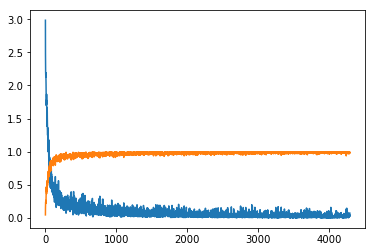

In [7]:
# Beginning of the training Section
with tf.Session() as sess:
    
    # Initialization
    sess.run(init)

    total_steps = int(55000/batch_size)
    loss_list = []
    acc_list = []
    for epoch in range(1, total_epochs+1):
        for step in range(1, total_steps+1):
            
            # Sample a batch of examples
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            
            # Reshape the 784*1 vector into 28*28,
            # which is the shape we want to feed into out model
            batch_x = batch_x.reshape(batch_size, timesteps, input_size)
            
            # Feed data into our model
            acc, loss, _ = sess.run([accuracy, loss_op, train_op], feed_dict={X:batch_x, Y:batch_y})
            loss_list.append(loss)
            acc_list.append(acc)
            if step%display_step == 0 or step == 1:
                print("Epoch "+str(epoch)+", Step "+str(step)+": Loss"+str(loss))
                #loss_list.append(loss)

    print("Training finished!")
    
    # Test our model
    test_len = 100
    test_x = mnist.test.images[:test_len].reshape((-1, timesteps, input_size))
    test_y = mnist.test.labels[:test_len]
    test_accuracy = sess.run(accuracy, feed_dict={X:test_x, Y:test_y})
    print("Accuracy: "+str(test_accuracy))
    plt.plot(loss_list)
    plt.plot(acc_list)
    plt.show()